# Face Landmark detection으로 고양이 스티커 붙이기

In [71]:
import numpy as np
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [64]:
sticker = cv2.imread("./cat-whiskers.png")
img = cv2.imread("./sample.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [65]:
detector_hog = dlib.get_frontal_face_detector()
faces = detector_hog(img, 1)

landmark_predictor = dlib.shape_predictor("./shape_predictor_68_face_landmarks.dat")

landmarks = []
for face in faces:
    points = landmark_predictor(img, face)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    landmarks.append(list_points)

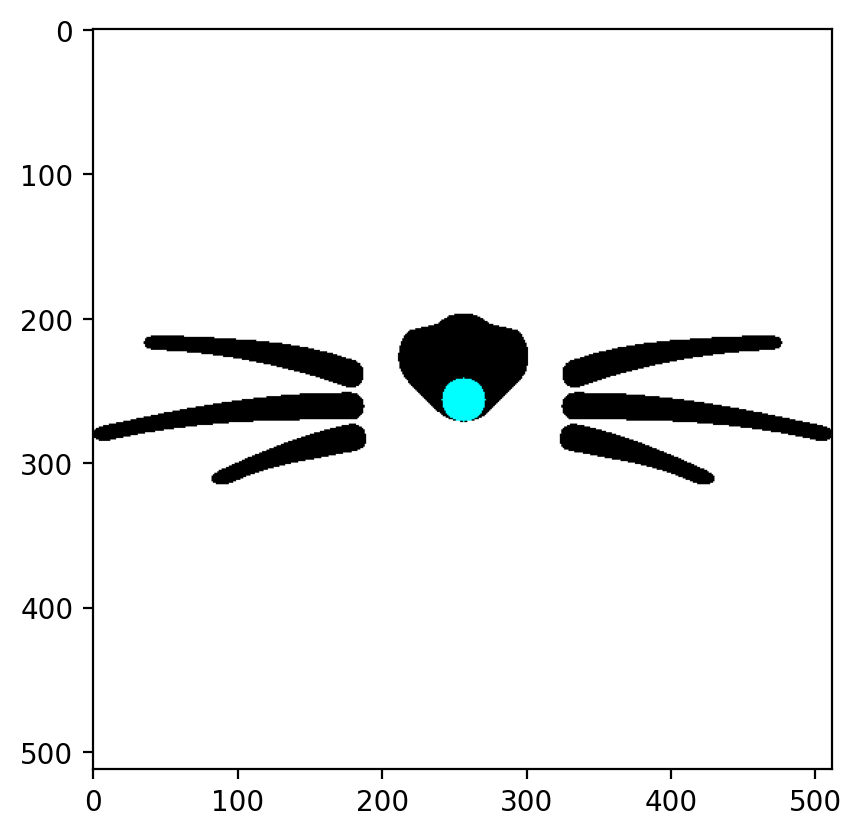

In [66]:
cv2.circle(sticker, (sticker.shape[1] // 2, sticker.shape[0] // 2), 15, (0, 255, 255), -1 )
plt.imshow(sticker)

106 204
(214, 213, 3) (214, 213, 3)


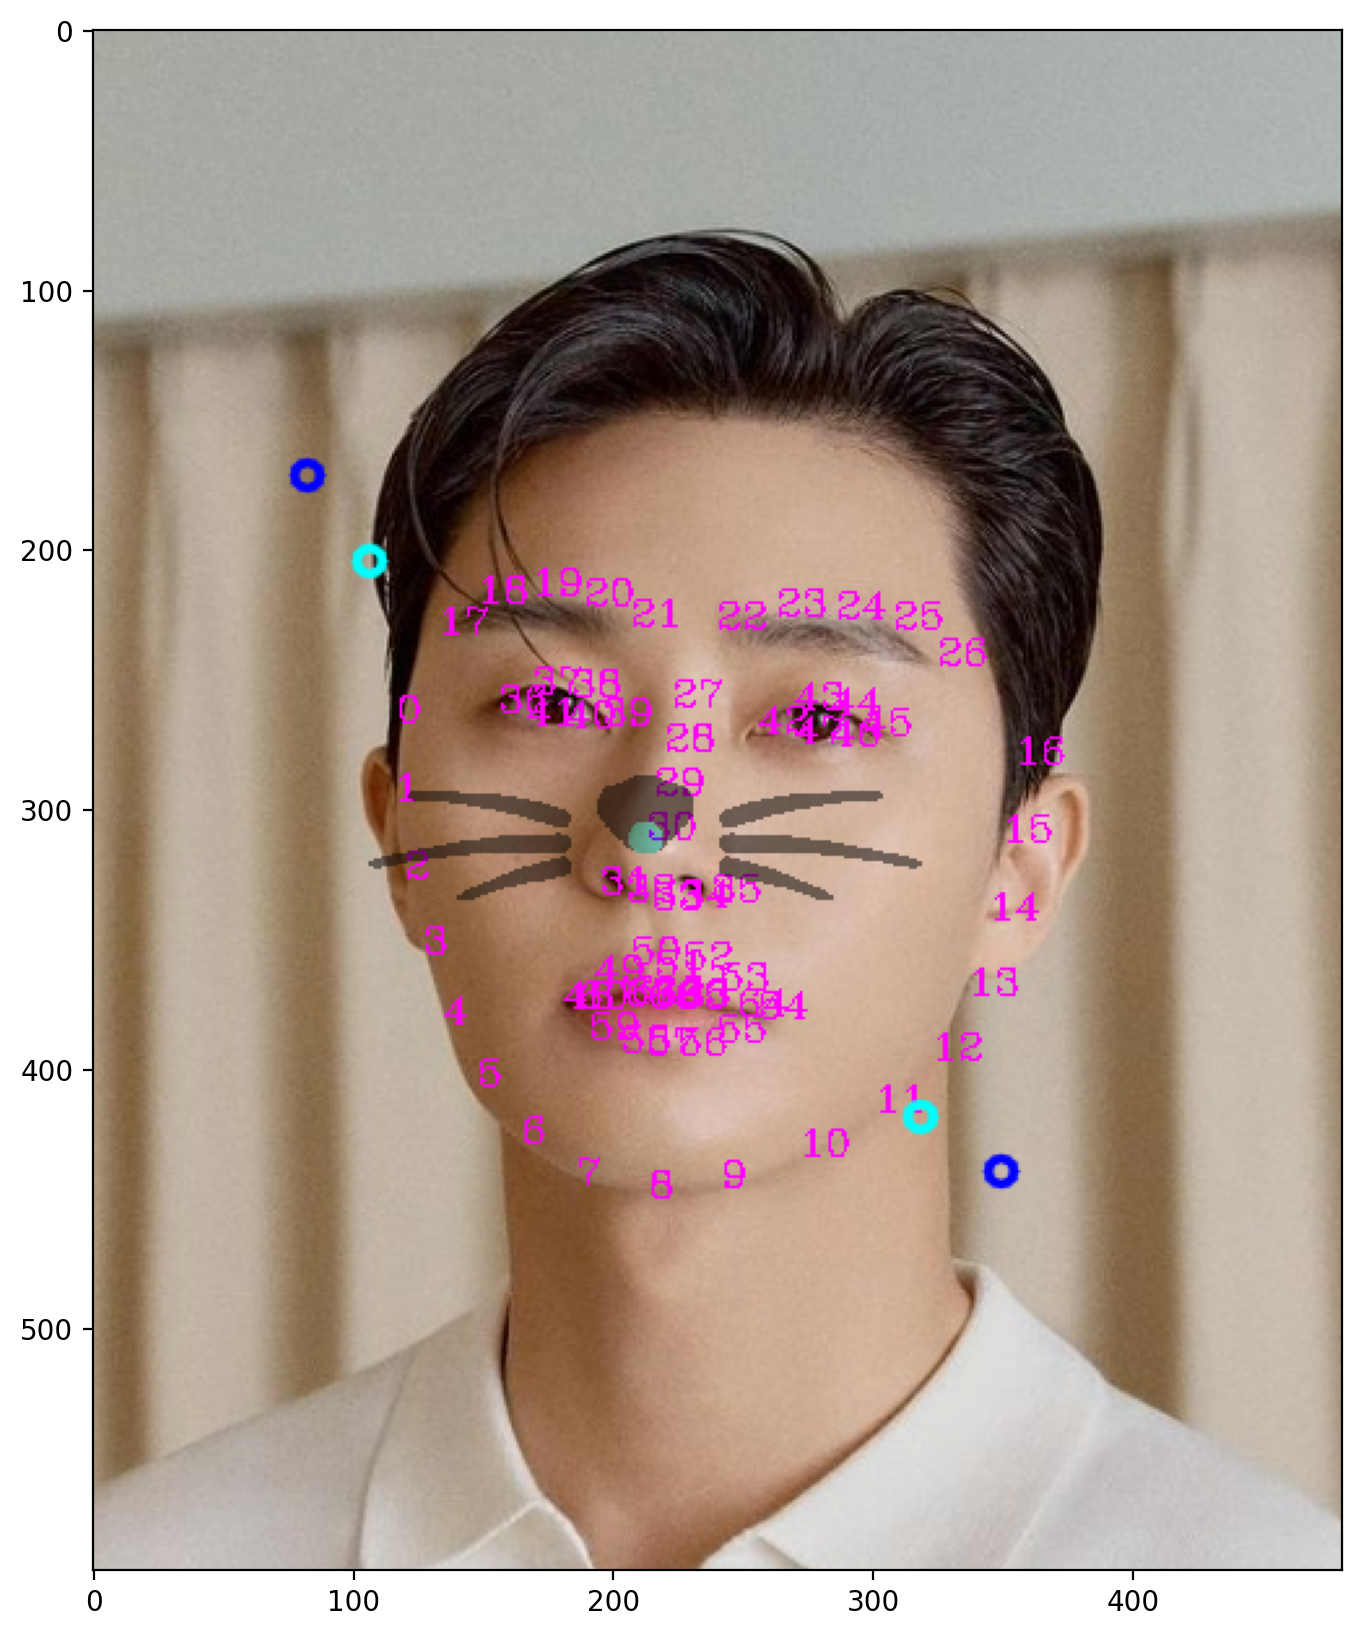

In [75]:
show = img.copy()
for landmark in landmarks:
    for i, p in enumerate(landmark):
        cv2.putText(show, f"{i}", p, cv2.FONT_HERSHEY_COMPLEX, 0.5, (255, 0, 255))

face_tlx = faces[0].left()
face_tly = faces[0].top()
face_brx = faces[0].right()
face_bry = faces[0].bottom()

face_size = int((face_brx - face_tlx) * 0.8), int((face_bry - face_tly) * 0.8)
sticker = cv2.resize(sticker, dsize=face_size)

tlx = landmarks[0][30][0] - sticker.shape[1] // 2
tly = landmarks[0][30][1] - sticker.shape[0] // 2
brx = landmarks[0][30][0] + sticker.shape[1] // 2
bry = landmarks[0][30][1] + sticker.shape[0] // 2

print(tlx, tly)
cv2.circle(show, (face_tlx, face_tly), 5, (0, 0, 255), 2, cv2.LINE_AA)
cv2.circle(show, (tlx, tly), 5, (0, 255, 255), 2, cv2.LINE_AA)
cv2.circle(show, (face_brx, face_bry), 5, (0, 0, 255), 2, cv2.LINE_AA)
cv2.circle(show, (brx, bry), 5, (0, 255, 255), 2, cv2.LINE_AA)

print(sticker.shape, show[tly:tly + sticker.shape[0], tlx:tlx + sticker.shape[1]].shape)
mask = np.where(sticker==0, sticker, show[tly:tly + sticker.shape[0], tlx:tlx + sticker.shape[1]]).astype(np.uint8)

show[tly:tly + sticker.shape[0], tlx:tlx + sticker.shape[1]] = cv2.addWeighted(mask, 0.5, show[tly:tly + sticker.shape[0], tlx:tlx + sticker.shape[1]], 0.5, 0.0)

plt.figure(figsize=(10, 10))
plt.imshow(show)

# 결과
잘 돈다. 근데 2D 정면이미지 기준이기 때문에 얼굴 회전각에 따라 정교하게 붙일 수 있는 방법이 필요해보인다.  
또한 거리에 따라서도 알맞게 스티커 사이즈가 작아져야 할 것 같다.